In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import pearsonr 
outdir = '/mnt/home/awakhloo/ceph/reprod_population_geom_opt_coding/results'
figdir = '/mnt/home/awakhloo/ceph/reprod_population_geom_opt_coding/figures/pngs'

In [2]:
dt=0.5
n_subset=500
#### LOAD PFC RESULTS
arrpf = np.load(f'/mnt/home/awakhloo/ceph/abstraction/results/PFC_results_nu_dt_{dt}.npy',
                allow_pickle=True).item() 
errs_pfc, all_geoms_pfc = arrpf['errs'], arrpf['all_geoms']
#### LOAD CA1 REUSLTS 
arrpf = np.load(f'/mnt/home/awakhloo/ceph/abstraction/results/CA1_results_nu_dt_{dt}.npy',
                allow_pickle=True).item() 
errs_ca1, all_geoms_ca1 = arrpf['errs'], arrpf['all_geoms']
Ep, Ec = errs_pfc.mean(0), errs_ca1.mean(0) # avg over neuron shuffs

In [4]:
## LOAD MONKEY RESULTS 
base='/mnt/home/awakhloo/'
path = 'ceph/abstraction/results/majaj_res.npy' 
res = np.load(base+path, allow_pickle=True).item() 
all_cls = res['all_classes']
glob_p = res['global_pooling'] 
proj88 = res['proj_88']

emppixmed, svcpixmed, thepixmed, geompixmed = all_cls[0]
empv4med, svcv4med, thev4med, geomv4med = all_cls[1]
empITmed, svcITmed, theITmed, geomITmed = all_cls[2] 

pemppixmed, psvcpixmed, pthepixmed, pgeompixmed = glob_p[0]
pempv4med, psvcv4med, pthev4med, pgeomv4med = glob_p[1]
pempITmed, psvcITmed, ptheITmed, pgeomITmed = glob_p[2]

emppixmedproj, svcpixmedproj, thepixmedproj, geompixmedproj = proj88[0]
empITmedproj, svcITmedproj, theITmedproj, geomITmedproj = proj88[1]

In [5]:
## LOAD MLP RESULTS 
outdir = '/mnt/home/awakhloo/ceph/abstraction/data/mlp_exps_P_500000_nonlin_relu_alpha_0.2' 
res = np.load(outdir + '/eg_geom_results.npy', allow_pickle=True).item()
rand_layer_names, errs_the_rand, errs_emp_rand, geoms_rand , \
trained_layer_names, errs_the_train, errs_emp_train, geoms_train, \
val_losses, train_losses, svm_rand, svm_train, \
derrs_t, derrs_e, dgeoms, ps, dsvm = res.values()
cmap = plt.get_cmap('YlGnBu')([0.6,0.8])
crand = cmap[0] 
ctrain = cmap[1] 

In [6]:
## LOAD POSE NETWORK RESULTS
pth = '/mnt/home/awakhloo/ceph/abstraction/results/pose_svm.pkl'
pth2 = '/mnt/home/awakhloo/ceph/abstraction/results/pose_svm_S.pkl'
rr = np.load(pth, allow_pickle=True)
rr2 = np.load(pth2,allow_pickle=True)
pose_svm = rr2['Egs_svm'].mean(1)
pose_eg  = rr['theory_hebb_Egs'].mean(1)

In [7]:
def make_plot(ax,title,errs, fontsize, color,axlabel): 
    svm, eg = errs 
    ax.set_title(title, fontsize=fontsize) 
    sns.regplot(x=eg,
                y=svm, 
                color=color,
               truncate=False,
               ax=ax) 
    r2 = round(stats.pearsonr(eg,svm)[0]**2,3)
    ax.text(0.625, .1, '$r^2$ = ' + str(r2), transform=ax.transAxes, 
            fontsize=fn*2/3)
    ax.text(-0.05, 1.15, axlabel, transform=ax.transAxes, 
            fontsize=fn, va='top', ha='left', fontweight='bold')
    ax.set_xlabel("Hebbian readout", fontsize=fn) 
    ax.set_ylabel("linear SVC", fontsize=fn)
    
    

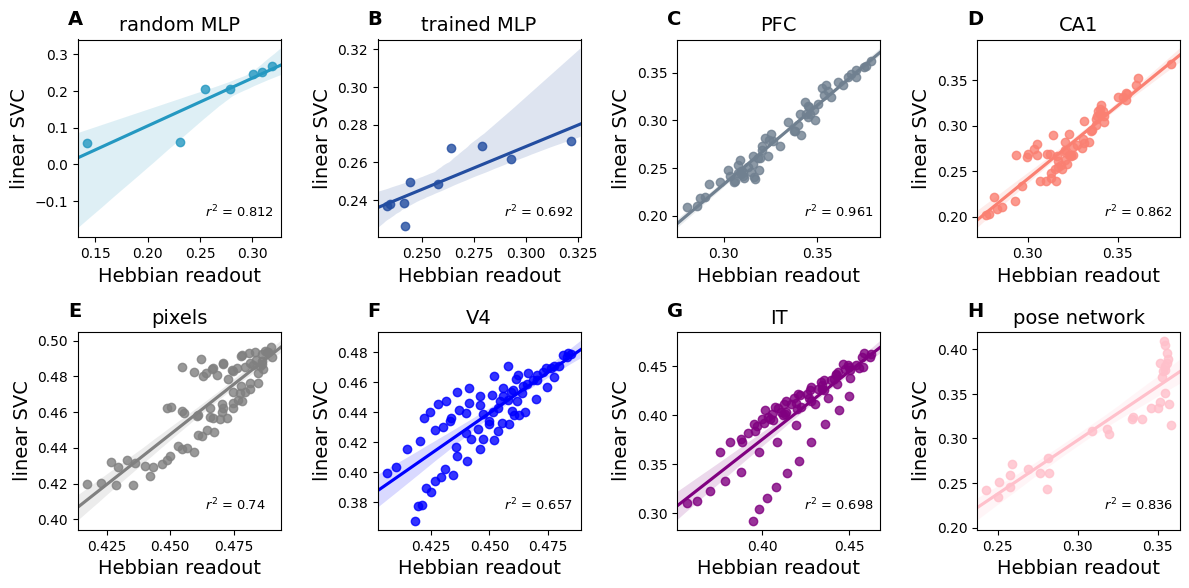

In [8]:
fn =14 
fig, axs = plt.subplots(2,4,figsize=(12,6))
titles = ['random MLP', 
          'trained MLP', 
          'PFC', 
          'CA1', 
          'pixels', 
          'V4', 
          'IT', 
          'pose network'] 
dpoints = [[svm_rand[:,0], errs_emp_rand[:,0]],
           [svm_train[:,0], errs_emp_train[:,0]],
            [Ep[...,3].reshape(-1), Ep[...,2].reshape(-1)], # flatten across animal x num training samples dims 
           [Ec[...,3].reshape(-1), Ec[...,2].reshape(-1)],
            [svcpixmed.mean(1).reshape(-1),  thepixmed.reshape(-1)],
        [svcv4med.mean(1).reshape(-1),  thev4med.reshape(-1)], 
        [svcITmed.mean(1).reshape(-1), theITmed.reshape(-1)], 
            [pose_svm, pose_eg]]
cs = [crand, ctrain, 'slategrey', 'salmon', 
      'grey', 'blue', 'purple', 'pink']
axlabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G','H']
for i, ax in enumerate(axs.flat): 
    make_plot(ax, titles[i], dpoints[i], fontsize=fn, color=cs[i],
             axlabel=axlabels[i])
    
plt.tight_layout() 
fig.savefig(figdir+'/sm_SVM_fig.pdf', 
            dpi=300) 